# Punto 1
> Genera un nuevo proyecto de Watson Studio dentro de la plataforma IBM Cloud con el nombre: Matemáticas Computacionales. Agrega un nuevo cuaderno de Jupyter al proyecto y resuelve las siguientes ecuaciones lineales:
1.  
    8x+5y+3z-6w=41

    15x-3y+4z+7w=13

    x+6y-2z+w=12

    -2x+y+7z-3w=0

In [2]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from sympy import *

In [3]:
Matriz1a=np.array([[8,5,3,-6],
                   [15,-3,4,7],
                   [1,6,-2,1],
                   [-2,1,7,-3]])
Vector1a=np.array([41,13,12,0])
X=np.linalg.solve(Matriz1a,Vector1a)
print("El valor de X es ",X[0],"El valor de Y es ",X[1],"El valor de Z es ",X[2],"El valor de W es ",X[3])

El valor de X es  2.4614363663176517 El valor de Y es  1.7942781300693125 El valor de Z es  -0.5527208376345668 El valor de W es  -2.3325468220026533


2.  
    x+4z=14

    5x+3y+2z=25
    
    3x+4y=-12

In [4]:
Matriz1B=np.array([[1,0,4],
                   [5,3,2],
                   [3,4,0]])
Vector1B=np.array([14,25,-12])

R0=np.linalg.det(Matriz1B)

MatrizR1=np.array([Vector1B,Matriz1B[:,1],Matriz1B[:,2]])
MatrizR2=np.array([Matriz1B[:,0],Vector1B,Matriz1B[:,2]])
MatrizR3=np.array([Matriz1B[:,0],Matriz1B[:,1],Vector1B])
R1=np.linalg.det(MatrizR1)
R2=np.linalg.det(MatrizR2)
R3=np.linalg.det(MatrizR3)
x1=R1/R0
x2=R2/R0
x3=R3/R0

print("El valor de X es ",x1,"El valor de Y es ",x2,"El valor de Z es ",x3)

El valor de X es  12.000000000000005 El valor de Y es  -12.000000000000005 El valor de Z es  0.4999999999999999


# Punto 2
> Realiza el siguiente ejercicio en un nuevo cuaderno dentro del mismo proyecto principal:
Dado el vector base, que genera el subespacio unidimensional . Encuentra el valor de la coordenada  , la proyección  y la matriz  para proyectar sobre el subespacio  el vector 

In [5]:
b = np.vstack([2,5])
x = np.vstack([-1,4])

print("Valor cordenada ")
lambd = np.dot(b.T,x)/npl.norm(b)**2 # b^T x / ||b||^2;
print(lambd)
print("")

print("Vector proyectado ")
vector_proyectado = b*lambd
print(vector_proyectado)

Valor cordenada 
[[0.62068966]]

Vector proyectado 
[[1.24137931]
 [3.10344828]]


In [6]:
print("Matriz para proyectar sobre el subespacio")
matriz_proyeccion = np.dot(b,b.T)/npl.norm(b)**2 #bb^T/||b||^2
print(matriz_proyeccion)
print("")

print("Vector de Matriz para proyectar")
print(np.dot(matriz_proyeccion,x))

Matriz para proyectar sobre el subespacio
[[0.13793103 0.34482759]
 [0.34482759 0.86206897]]

Vector de Matriz para proyectar
[[1.24137931]
 [3.10344828]]


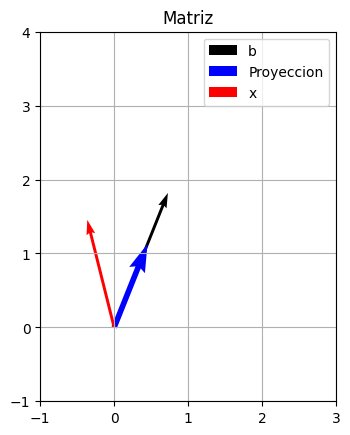

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(-1,3)
plt.ylim(-1,4)

plt.quiver(*np.vstack([0,0]),*b, scale=11, color="Black", width= .01)
plt.quiver(*np.vstack([0,0]),*vector_proyectado,scale=11,color="Blue",width= .019)
plt.quiver(*np.vstack([0,0]),*x,scale=11,color="red",width= .01)

ax.set_aspect('equal', adjustable='box')
plt.title("Matriz")
plt.legend(["b",r"Proyeccion","x"]);
plt.grid()

# Punto 3
> En el mismo cuaderno de la pregunta 2, utiliza como base la matriz encontrada y haz el cálculo de sus autovalores y autovectores. Realiza a continuación su autodescomposición y grafica los resultados obtenidos en un plano con Matplotlib. Elabora una pequeña conclusión sobre tu aprendizaje.

In [8]:
Autovalores, Autovectores=np.linalg.eig(matriz_proyeccion)
autovector_1= npl.eig(matriz_proyeccion)[1][:,1]
autovector_2= npl.eig(matriz_proyeccion)[1][:,0]
print("El autovalor de la matriz es ")
print(Autovalores)
print("")
print("El autovector de la matriz es ")
print(Autovectores)

El autovalor de la matriz es 
[1.11022302e-16 1.00000000e+00]

El autovector de la matriz es 
[[-0.92847669 -0.37139068]
 [ 0.37139068 -0.92847669]]


In [9]:
def graficarVectores(vecs,cols):
  plt.figure(figsize=(5,5))
  for i in range(len(vecs)):
    vec=vecs[i]
    plt.quiver(0,0,vec[0],vec[1],color=cols[i],angles='xy',scale_units='xy',scale=1)

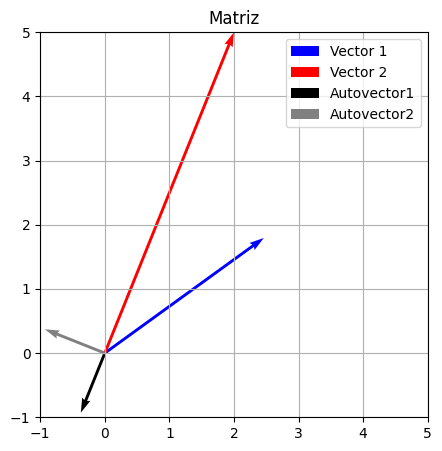

In [10]:
graficarVectores([X,b,autovector_1,autovector_2],['blue','red','black','gray'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title("Matriz")
plt.legend(["Vector 1","Vector 2","Autovector1","Autovector2"]);

plt.grid()

# **Punto 4**
> Localiza un conjunto de datos de tu preferencia que incluya varios campos con información numérica, de los cuales puedas inferir que al menos uno se comporte de acuerdo con la distribución normal (edades, tamaños, pesos, distancias, densidades, etc.).

> En un nuevo cuaderno de Jupyter que esté integrado dentro del proyecto en el cual se está trabajando:

1. Crea varios arreglos que contengan de manera independiente los valores de cada columna identificada.
2. Construye el histograma referente a cada arreglo creado en el punto anterior.
3. Evalúa si las gráficas obtenidas tienen semejanzas con la distribución normal y obtén la media, la mediana y la desviación estándar de los datos en caso de que corresponda.
4. Para las representaciones válidas, dibuja la gráfica de la distribución gaussiana correspondiente.

In [11]:
Data1 = pd.read_csv("Airbnb_European/amsterdam_weekdays.csv")

In [12]:
Data1.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [13]:
fig=px.scatter(Data1, x="guest_satisfaction_overall", y="realSum",color="room_type",size="person_capacity", template="simple_white",marginal_y="box")
fig.show()

In [14]:
Columna=Data1["realSum"]
Sigma=Columna.std()
Mu=np.mean(Columna)
Mediana=np.median(Columna)
#media
print("La media es de ",Mu)
#mediana
print("La mediana es de ",Mediana)
#Desvacion estandar
print("La desviacion estandar es de ",Sigma)

La media es de  545.0205264394507
La mediana es de  430.24863496824696
La desviacion estandar es de  416.9743138290874


In [30]:
Data2 = pd.read_csv("Airbnb_European/amsterdam_weekends.csv")
Columna2=Data2["realSum"]

import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)


hist_data = [Columna,Columna2]
group_labels = ['precio1','precio2'] # name of the dataset

fig.update_layout(title_text='distribucion de precios')


fig.show()

In [31]:
import plotly.figure_factory as ff
import numpy as np

x1 = Columna
x2 = Columna2

group_labels = ['Group 1', 'Group 2']

colors = ['slategray', 'magenta']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([x1, x2], group_labels, bin_size=.5,
                         curve_type='normal', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

# **Punto 5**
> Investiga sobre funciones matemáticas multivariables (dos variables) conocidas que describan situaciones comunes de la vida real. Considera un punto inicial y encuentra el valor mínimo estimado para la que dicha función converge. Elabora tu respuesta como una función independiente que puedas importar al proyecto principal con el que has estado trabajando durante toda la evidencia.

In [16]:
import scipy.optimize as opt
x,y = symbols('x,y')
funcion = (21*x**2+4*x*x+3*x+6*y**2-y)
punto_inicio = np.vstack([2,4])
f = lambdify('x,y',funcion)
funcion

25*x**2 + 3*x + 6*y**2 - y

In [17]:
l = 4
n = 150
linspace = np.linspace(-l,l,n) 
X,Y = np.meshgrid(linspace,linspace)
Z = f(X,Y)
gradiente = lambdify('x,y',(funcion.diff(x),funcion.diff(y)))
def gradientDescent(gradiente,punto_inicio, tamaño_paso = .085, precision = .01, max_iter = 3000, initError = 10):
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])
    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 
        prevX = currX.copy() 
        currX -= tamaño_paso * np.array(gradiente(x,y)) 
        x,y = currX[0].copy(), currX[1].copy() 
        error = currX - prevX 
        iterCoords.append(np.hstack([x,y])) 
    return currIter, currX, np.vstack(iterCoords)
pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,punto_inicio)

<lambdifygenerated-2>:2: RuntimeWarning:

overflow encountered in multiply

C:\Users\leona\AppData\Local\Temp\ipykernel_22252\2849590384.py:15: RuntimeWarning:

invalid value encountered in subtract



El minimo valor es de  601


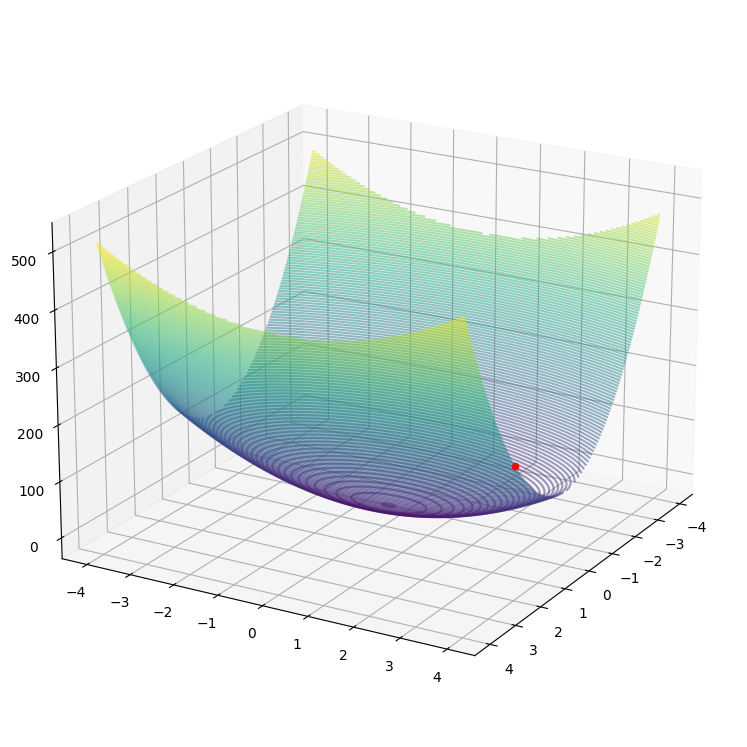

In [18]:
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
ax.view_init(20, 30);
ax.scatter3D(punto_inicio[0],punto_inicio[1],f(*punto_inicio), color='red')
ax.view_init(20, 30);

print("El minimo valor es de ",pasos_totales)